# Dogs vs Cats 

In this notebook there are 12500 images of dogs and 12500 images of cats, and i will try to classify them into dog or cat, using different models 

### Import necessary libraries

In [257]:
import numpy as np
import pandas as pd
import os
import cv2
from skimage.io import imread
import random
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
# # models part
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import xgboost
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
# warnings
import warnings
warnings.filterwarnings('ignore')

### Some images from the dataset

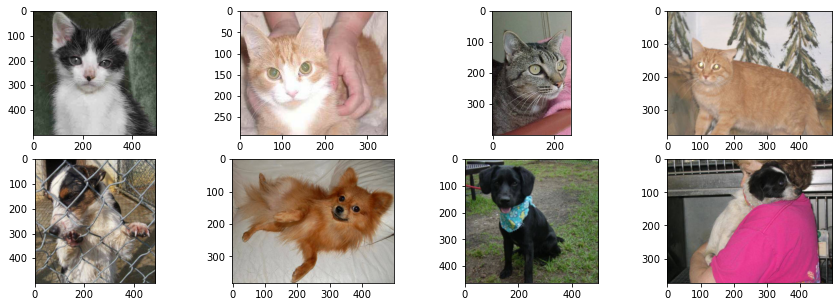

In [5]:
f = plt.figure(figsize=(15,5))
for i in range(1,5):
    r=random.randint(1,2000)#random image of dog
    img=mpimg.imread("C:/Users/97254/.conda/train/cat.{}.jpg".format(r))#loading image
    ax=f.add_subplot(2,4,i)
    plt.imshow(img)
    r=random.randint(1,2000)#random image of dog
    img=mpimg.imread("C:/Users/97254/.conda/train/dog.{}.jpg".format(r))#loading image
    ax=f.add_subplot(2,4,i+4)
    plt.imshow(img)

**The images has different sizes, and we want to work with same size for all images**

**So i reshaped the images to same size-75*75 because i saw below its understood and grayscale the images**

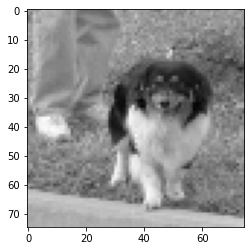

In [6]:
#grayscale image
exm=cv2.imread("C:/Users/97254/.conda/train/dog.2.jpg")#loading image
bnw_exm=cv2.cvtColor(exm, cv2.COLOR_RGB2GRAY)
bnw_exm=cv2.resize(bnw_exm,(75,75))
plt.imshow(bnw_exm,cmap='gray')
plt.show()

## Data preperation

**First, i created a list and added all images to the list**

In [258]:
from os import listdir
X = list()
for file in listdir('C:/Users/97254/.conda/train/'):
    img = cv2.imread("C:/Users/97254/.conda/train/"+file)#loading image
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#grayscale image
    resized_img = cv2.resize(gray_img, (75,75))#resize to 75*75
    X.append(resized_img)

**Reduce the array to 2 dim(neccesary for creating dataframe)**

In [259]:
X=np.asarray(X)
X.shape

(25000, 75, 75)

In [260]:
X=X.reshape((25000,5625))
X.shape

(25000, 5625)

In [261]:
df = pd.DataFrame(X)

In [262]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624
0,170,174,181,185,189,193,197,199,202,204,...,7,3,3,3,3,2,2,2,2,2
1,43,43,51,47,40,45,46,61,34,45,...,55,41,42,51,54,59,62,65,50,32
2,43,40,46,49,58,53,50,60,53,50,...,77,115,150,163,156,134,147,160,172,155
3,220,223,228,231,224,235,227,225,228,231,...,239,234,228,215,205,203,213,222,212,213
4,114,121,102,85,112,133,160,146,171,208,...,100,105,94,93,93,93,115,92,95,85


**Create new columm-'label'(dog or cat)**

**Beause the first half of the images are cats, i filled the 'label' columm with zeros, and the second half with ones**

In [263]:
z=np.zeros(12500)
z_o=np.concatenate((z,np.ones(12500)))
df['label']=z_o

In [73]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,label
0,170,174,181,185,189,193,197,199,202,204,...,3,3,3,3,2,2,2,2,2,0.0
1,43,43,51,47,40,45,46,61,34,45,...,41,42,51,54,59,62,65,50,32,0.0
2,43,40,46,49,58,53,50,60,53,50,...,115,150,163,156,134,147,160,172,155,0.0
3,220,223,228,231,224,235,227,225,228,231,...,234,228,215,205,203,213,222,212,213,0.0
4,114,121,102,85,112,133,160,146,171,208,...,105,94,93,93,93,115,92,95,85,0.0


In [74]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,label
24995,140,142,144,146,147,149,148,150,151,152,...,164,164,164,166,166,167,168,168,169,1.0
24996,101,77,95,105,113,72,86,81,65,76,...,77,88,93,79,89,86,79,102,72,1.0
24997,33,37,52,61,52,53,58,40,48,53,...,114,120,133,121,130,101,129,115,178,1.0
24998,255,248,235,219,200,146,104,69,56,60,...,107,100,79,89,96,112,110,108,120,1.0
24999,240,242,242,241,244,249,246,244,243,243,...,254,254,254,254,254,254,254,254,254,1.0


In [264]:
df.iloc[12499:12501, 5625:5626]

,label
12499,0.0
12500,1.0


### train-test split

#### I will split the data 2 times, one for validation, and one for testing(beacuse the original test data has no labels)

In [304]:
y = df['label']
X = df.drop(['label'], axis=1).to_numpy()

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)
X_train, x_val, y_train, y_val = train_test_split(X_train_f, y_train_f, test_size = 0.2, random_state=42, shuffle = True)

## PCA

### Choosing the right number of Dimensions

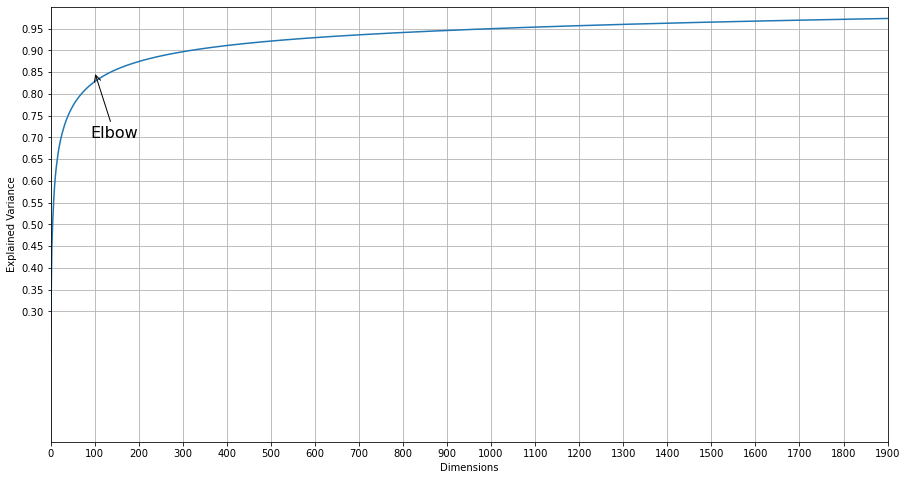

In [55]:
pca = PCA()
pca.fit(X_train)
plt.figure(figsize=(15,8))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.axis([0, 1500, 0, 1])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.annotate("Elbow", xy=(100, 0.85), xytext=(90, 0.7),arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.xticks(range(0,2000,100))
plt.yticks(np.arange(0.3,1.0,0.05))
plt.grid(True)

* 'elbow' shows where the explained variance stops growing fast

We can see that even a before 150 dimensions the explained variance stops growing fast! 
It means i can take even only about 150 dimensions instead of 5625 dimensions, most of the variance is preserved, and my data will be less than 10% from the original size!

**So i decided to take only 50 dimensions, and let's start modeling**

## Modeling

* First, i will take few models and check the score of them with 50 dimensions on the validation set
* Then, i will use grid search to improve the score 
* Finally, after finishing train the models on the validation set, check them one time on the test set

In [305]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_val = scaler.transform(x_val)

In [306]:
# 50 dimensions
pca = PCA(n_components=50)
X_train_red = pca.fit_transform(X_train)
X_val_red=pca.transform(x_val)

In [268]:
def resultd(model):
    model.fit(X_train_red, y_train)
    print(round(model.score(X_val_red,y_val)*100,4),"%")

### KNN

In [148]:
knn = KNeighborsClassifier(n_neighbors = 5)
resultd(knn)

60.2 %


### Random forrest

In [149]:
rf = RandomForestClassifier(max_depth= 15, n_estimators= 225)
resultd(rf)

63.475 %


### XGboost

In [150]:
xgbc=xgb.XGBClassifier(n_estimators=240,learning_rate= 0.2,use_label_encoder=False,eval_metric='mlogloss')
resultd(xgbc)

62.825 %


#### At this point, random forrest is the best model

### grid search 

* I'm going to use grid search to try to improve the scores
* I will find the best parameters for each model i used
* Then, i will train it on the reduced validation set with 50 features, as i did before 
* finally, evaluate on the reduced validation set 

### KNN

In [314]:
## Fit on the reduced train set
## i decided used cv=2 to save running time
param_grid_knn=[{'n_neighbors': [5,7,10,15,17],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
model=KNeighborsClassifier()
grid_search_k=GridSearchCV(model,param_grid_knn,cv=2,scoring='accuracy')
grid_search_k.fit(X_train_red, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [5, 7, 10, 15, 17]}],
             scoring='accuracy')

In [315]:
grid_search_k.best_params_

{'algorithm': 'auto', 'n_neighbors': 17}

In [316]:
# evaluation on validation set
knn_res=grid_search_k.best_estimator_
print(round(knn_res.score(X_val_red,y_val)*100,4),"%")

61.2 %


**Improvement by almost 1%**

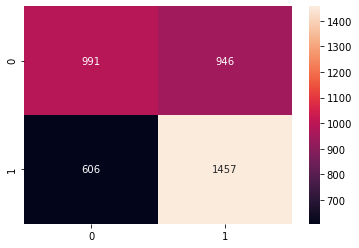

In [328]:
# confusion matrix
y_pred=knn_res.predict(X_val_red)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### Random forrest

In [318]:
## Fit on the reduced train set
param_grid_rf_v=[{'n_estimators':[150,200,250,300,350],'max_depth':[7,12,15,18,20]}]
model=RandomForestClassifier()
grid_v=GridSearchCV(model,param_grid_rf_v,cv=2,scoring='accuracy')
grid_v.fit(X_train_red, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7, 12, 15, 18, 20],
                          'n_estimators': [150, 200, 250, 300, 350]}],
             scoring='accuracy')

Text(0.5, 1.0, 'score for estimators')

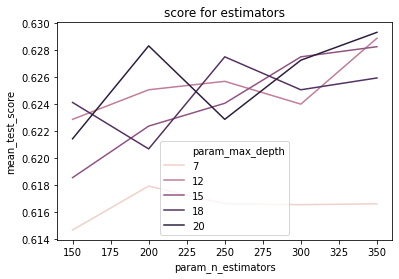

In [319]:
cv_res_v=pd.DataFrame(grid_v.cv_results_)
sns.lineplot(data=cv_res_v,y='mean_test_score',x='param_n_estimators',legend='full',hue='param_max_depth')
plt.title('score for estimators')

In [320]:
grid_v.best_params_

{'max_depth': 20, 'n_estimators': 350}

In [321]:
# evaluation on validation set
rf = RandomForestClassifier(max_depth= 20, n_estimators= 350)
resultd(rf)

64.7 %


##### **Improvement by more than 1%**

* Let's check bigger number of estimators

In [322]:
# Fit on the reduced train set
param_grid_rfr=[{'n_estimators':[500,600,700],'max_depth':[7,12,15,18,20]}]
model=RandomForestClassifier()
grid_r=GridSearchCV(model,param_grid_rfr,cv=2,scoring='accuracy')
grid_r.fit(X_train_red, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7, 12, 15, 18, 20],
                          'n_estimators': [500, 600, 700]}],
             scoring='accuracy')

Text(0.5, 1.0, 'score for estimators')

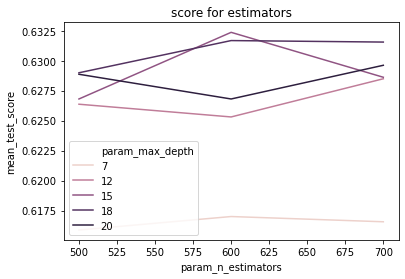

In [323]:
cv_res_r=pd.DataFrame(grid_r.cv_results_)
sns.lineplot(data=cv_res_r,y='mean_test_score',x='param_n_estimators',legend='full',hue='param_max_depth')
plt.title('score for estimators')

In [324]:
grid_r.best_params_

{'max_depth': 15, 'n_estimators': 600}

In [325]:
rfc = RandomForestClassifier(max_depth= 15, n_estimators= 600)
resultd(rfc)

64.325 %


* The score is lower, so i will stay with the first score

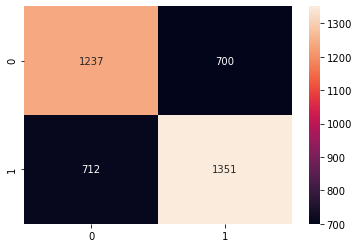

In [326]:
# confusion matrix
y_pred=rf.predict(X_val_red)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### XGBoost

In [327]:
## Fit on the reduced train set
param_grid_xg_v=[{'n_estimators':[160,180,200,220,240],'learning_rate':[0.2,0.5,1,1.5,2]}]
model=xgb.XGBClassifier(eval_metric='mlogloss')
grid_search_xg_v=GridSearchCV(model,param_grid_xg_v,cv=2,scoring='accuracy')
grid_search_xg_v.fit(X_train_red, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample

Text(0.5, 1.0, 'score for estimators')

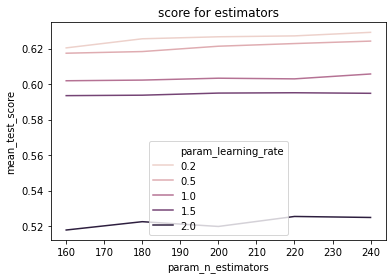

In [329]:
cv_res=pd.DataFrame(grid_search_xg_v.cv_results_)
sns.lineplot(data=cv_res,y='mean_test_score',x='param_n_estimators',legend='full',hue='param_learning_rate')
plt.title('score for estimators')

In [330]:
grid_search_xg_v.best_params_

{'learning_rate': 0.2, 'n_estimators': 240}

In [338]:
# evaluation on validation set
xgbc=xgb.XGBClassifier(n_estimators=240,learning_rate= 0.2,use_label_encoder=False,eval_metric='mlogloss')
resultd(xgbc)

62.6 %


**The score here is similar to the score before the grid**

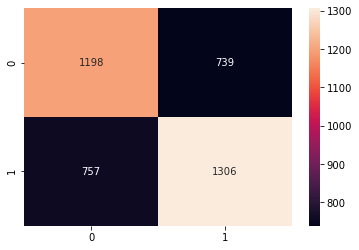

In [339]:
# confusion matrix
y_pred=xgbc.predict(X_val_red)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### KMeans

In [44]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50)),
("log_reg", LogisticRegression()),
])
pipeline.fit(X_train_red, y_train)

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=2, verbose=2)
grid_clf.fit(X_train_red, y_train)


Fitting 2 folds for each of 98 candidates, totalling 196 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.5s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.6s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.6s
[CV] kmeans__n_clusters=6 ............................................
[CV] ............................. kmeans__n_clusters=6, total=   0.9s
[CV] 

[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed: 11.8min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [45]:
grid_clf.best_params_
grid_clf.score(X_val_red, y_val)

0.6118666666666667

**The score of kmeans is only higher from knn model**

### Voting

#### now let's take the best params of the models and use it inside voting

In [355]:
# soft voting with weight- i decided to les weight to knn because it has less accuracy
rf = RandomForestClassifier(max_depth=20, n_estimators=350)
knn = KNeighborsClassifier(n_neighbors = 17)
xgbc=xgb.XGBClassifier(n_estimators=240,use_label_encoder=False,learning_rate= 0.2,eval_metric='mlogloss')
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgbc)],voting='soft',weights=[3,3,1])
resultd(voting)

64.225 %


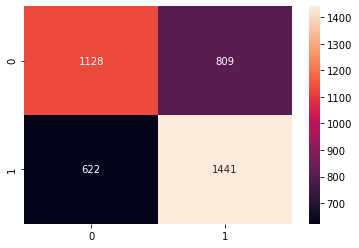

In [356]:
# confusion matrix
y_pred=voting.predict(X_val_red)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [357]:
# hard voting
rf = RandomForestClassifier(max_depth=20, n_estimators=350)
knn = KNeighborsClassifier(n_neighbors = 17)
xgbc=xgb.XGBClassifier(n_estimators=240,use_label_encoder=False,learning_rate= 0.2,eval_metric='mlogloss')
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgbc)],voting='hard')
resultd(voting)

64.35 %


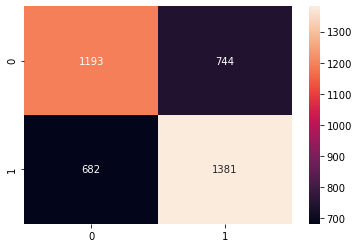

In [358]:
# confusion matrix
y_pred=voting.predict(X_val_red)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### Subtotal

In [341]:
data = {'knn':  ['61.20%'],
        'Random Forest': ['64.70%'],
        'voting (hard)': ['64.35%'],
        'Kmeans':['61.18%'],
        'xgboost':['62.60%']
        }
df = pd.DataFrame (data, columns = ['knn','Random Forest','Kmeans','xgboost','voting (hard)']
                   ,index=['accuracy'])
df

,knn,Random Forest,Kmeans,xgboost,voting (hard)
accuracy,61.20%,64.70%,61.18%,62.60%,64.37%


## After dimensionality reduction to 50 using pca, the best score on the validation set is random forest with 64.7%

### Result on the test set

* i will take the 2 best models and see the score on the test set. i will do it one time and this is the final result

In [307]:
def res_test(model):
    pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=50)),
                ('mod', model)])
    pipe.fit(X_train_f, y_train_f)
    print(round(pipe.score(X_test_f,y_test_f)*100,4),"%")

### Voting

In [346]:
rf = RandomForestClassifier(max_depth=20, n_estimators=350)
knn = KNeighborsClassifier(n_neighbors = 17)
xgbc=xgb.XGBClassifier(n_estimators=240,use_label_encoder=False,learning_rate= 0.2,eval_metric='mlogloss')
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgbc)],voting='hard')
res_test(voting)

64.76 %


### Random forrest

In [352]:
rf = RandomForestClassifier(max_depth= 20, n_estimators= 350)
res_test(rf)

64.56 %


## Final result: the best result is voting with 64.76%, after dimensionality reduction to 50 using pca